## Laboratorium 2

In [1]:
import numpy as np
import time
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

### Zadanie 1

In [4]:
def findMax(tab, l): # return iterator

    max_num = float("-inf")
    current_i = l

    for i in range(l, len(tab)):
        if tab[i][l] > max_num:
            current_i = i
            max_num = tab[i][l]

    return current_i


In [5]:
def solverGaussJordan(A, B):
    n = len(A)

    a = A.copy()
    b = B.copy()
    
    a = np.column_stack((a, b))

    for i in range(n):

        switch_i = findMax(a, i)
        a[[i, switch_i], :] = a [[switch_i, i], :]
        # print(a)
        
        for k in range(i):
            # print(i)
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0

        for k in range(i+1, n):
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0
    for i in range(n):
        tmp = a[i][i]
        a[i][n] /= tmp
        a[i][i] /= tmp
        

    solve = np.ones((n,1), dtype=np.float64)
    for i in range(n):
        solve[i][0] *= a[i][n]
    # print(a) # skasować gdy 500 albo wiecej
    return solve
    


In [6]:
a = np.array([(1, 2, 3),
              (4, 5, 6),
              (7, 8, 9)], dtype=np.float64)
b = np.array([(1,),
              (2,),
              (3,)], np.float64)

# Dla 500
# A = np.random.uniform(0,10, (500, 500))
# B = np.random.uniform(0,10, (500,1))

A = np.random.uniform(0,10, (3, 3))
B = np.random.uniform(0,10, (3,1))


In [7]:
def gaussJordanTimes(a, b):
    time_s = 0
    n = len(a)
    # print(n)
    
    time_s = time.perf_counter()
    result1 = solverGaussJordan(a, b)
    time_gs = time.perf_counter() - time_s

    time_s = time.perf_counter()
    result2 = np.linalg.solve(a, b)
    time_np_solve = time.perf_counter() - time_s
    
    if np.allclose(result1, result2):
        print("Times for {length}x{length} matrix: \n\
GaussJordan solve: {GJ}   numpy solve: {np_solve}".format(length = n, GJ = time_gs, np_solve = time_np_solve))

    else:
        print("Błędnie wyliczony wynik.")

In [8]:
result1 = solverGaussJordan(A, B)
np_result1 = np.linalg.solve(A,B)
print(np.allclose(np_result1, result1))
print(result1)

True
[[ 4.24841575]
 [-3.68845708]
 [ 1.87590199]]


Porównanie czasu wykonania własno-zaimplementowanego algorytmu z algorytmem z biblioteki numpy


In [9]:
n = 100
table_len = 15
A = [np.random.randint(0, 100, (n * i, n * i)).astype(np.float64) for i in range(1, table_len + 1)]
B = [np.random.randint(0, 100, (n * i, 1)).astype(np.float64) for i in range(1, table_len + 1)]

In [24]:
for i in range(table_len):
    gaussJordanTimes(A[i], B[i])

Times for 100x100 matrix: 
GaussJordan solve: 0.04940376099693822   numpy solve: 0.007131532001949381
Times for 200x200 matrix: 
GaussJordan solve: 0.1923043329952634   numpy solve: 0.03221687400218798
Times for 300x300 matrix: 
GaussJordan solve: 0.3639812740002526   numpy solve: 0.07934849799494259
Times for 400x400 matrix: 
GaussJordan solve: 0.6778506709961221   numpy solve: 0.1314505639966228
Times for 500x500 matrix: 
GaussJordan solve: 1.066565916997206   numpy solve: 0.0077311860004556365
Times for 600x600 matrix: 
GaussJordan solve: 1.5990696270018816   numpy solve: 0.02043770499585662
Times for 700x700 matrix: 
GaussJordan solve: 2.240836890996434   numpy solve: 0.007928277002065443
Times for 800x800 matrix: 
GaussJordan solve: 3.1222133910050616   numpy solve: 0.031608698998752516
Times for 900x900 matrix: 
GaussJordan solve: 4.369718711997848   numpy solve: 0.26409785500436556
Times for 1000x1000 matrix: 
GaussJordan solve: 5.329039288997592   numpy solve: 0.021423370002594

### Zadanie 2 - faktoryzacja

In [11]:
def factorization(A):
    a = A.copy().astype(np.float64)
    n = len(A)
    for i in range(n):
        for j in range(i+1, n):
            x = a[j][i] / a[i][i]
            a[j, i:] = (-1) * x * a[i, i:] + a[j, i:]
            a[j][i] = x
    L = np.tril(a)
    np.fill_diagonal(L, 1)
    U = np.triu(a)
    return L, U

Testowanie poprawności faktoryzacji macierzy

In [12]:
matrix1 = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]], dtype=np.float64)

In [13]:
matrix2 = np.array([[2,2,2],
                    [4,7,7],
                    [6,18,22]], dtype=np.float64)

In [14]:
l1, u1 = factorization(matrix1)
np.allclose(matrix1 - l1@u1, np.zeros((3,3)))

True

In [15]:
print(l1)
print(u1)

[[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
[[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 0.  0.  0.]]


In [16]:
l2, u2 = factorization(matrix2)
np.allclose(matrix2 - l2@u2, np.zeros((3,3)))

True

### Zadanie 3 - analiza obwodu elektrycznego


In [12]:
def loadGraph(filename: str):
    with open(filename, "r") as file:
        graph = [[] for i in range(int(file.readline()))]
        sem = file.readline().split()
        S, T, E = int(sem[0]), int(sem[1]), int(sem[2])
        lines = file.readlines()
        for line in lines:
            s = line.split()
            if len(s) < 3:
                continue
            u = int(s[0]) - 1
            v = int(s[1]) - 1
            cost = int(s[2])
            graph[u].append((v, cost))
            graph[v].append((u, cost))
    graph[S-1].append((T-1,E))
    graph[T-1].append((S-1,E))
    return graph, S, T, E


In [90]:
graph, s, t, E = loadGraph("graf.txt")

In [42]:
print(graph)

[[(1, 3), (3, 1), (5, 3), (6, 777777), (4, 5)], [(0, 3), (4, 1000000), (6, 5)], [(4, 2), (5, 555555), (7, 0)], [(0, 1), (5, 3), (6, 888888)], [(1, 1000000), (2, 2), (0, 5)], [(0, 3), (2, 555555), (3, 3)], [(1, 5), (0, 777777), (3, 888888)], [(2, 0)]]


In [79]:
print(s, t, E)

1 5 5


In [86]:
def graphToNx(graph, s, t):
    fig, ax1 = plt.subplots()

    G = nx.DiGraph()
    n = len(graph)
    max_weigh = 0

    labels = {}

    for i in range(n):
        for j, cost in graph[i]:
            G.add_edge(i, j, weight=cost)
            max_weigh = max(cost, max_weigh)

    pos = nx.planar_layout(G)

    for node in G.nodes():
        labels[node] = node

    bounds = np.linspace(0, max_weigh, min(max_weigh + 1, 255))
    tickks = np.linspace(0, max_weigh, min(10, max_weigh + 1))
    cmap = plt.cm.jet
    # print(cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])

    edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
    # print(edges)

    # nx.draw(G, pos = pos, width = 3, edge_color=weights, edge_cmap = cmap, with_labels = True, ax = ax1)
    nx.draw_networkx_nodes(G, pos=pos, ax=ax1)
    nx.draw_networkx_edges(
        G,
        pos=pos,
        width=2,
        arrowstyle="->",
        arrowsize=15,
        edge_color=weights,
        edge_cmap=cmap,
        ax=ax1,
    )

    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="r", ax = ax1)

    # print(nx.cycle_basis(G, 0))
    
    
    # nx.draw(G, with_labels=True)
    # nx.draw(G, with_labels = True, ax = ax1)
    # print(weights)
    cb = mpl.colorbar.ColorbarBase(
        ax2,
        cmap=cmap,
        norm=norm,
        spacing="proportional",
        ticks=tickks,
        boundaries=bounds,
        format="%1i",
    )


Znajdowanie fundamentalnych cykli w grafie - algortym Patona

In [88]:
def paton(G, root = None):
    
    nodes_of_graph = set(range(len(G)))
    cycles = []
    # checking all connected components
    while nodes_of_graph:
        if root is None:
            root = nodes_of_graph.pop() 
        stack = [root]
        parent = {root : root}
        T = {root: {}}

        while stack:
            z = stack.pop()
            zused = T[z]
            for v, cost in G[z]:
                if v not in T: # first time
                    T[v] = {z}
                    parent[v] = z
                    stack.append(v)
                elif v == z: # self cycle
                    cycles.append([v])
                elif v not in zused: # find cycle - node v in spanning tree
                    level = T[v]
                    cycle = [v, z]
                    p = parent[z]

                    while p not in level:
                        cycle.append(p)
                        p = parent[p]
                    
                    cycle.append(p)
                    cycles.append(cycle)
                    T[v].add(z)
        
        nodes_of_graph -= set(parent)
    
    return cycles




In [89]:
paton(graph, 0)
        

[[1, 4, 0], [5, 2, 4, 0], [1, 6, 0], [3, 6, 0], [3, 5, 0]]

Przykladowe wyświetlenie grafu z colormapą

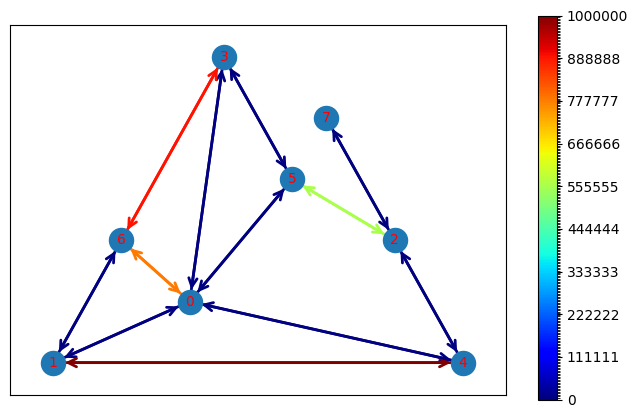

In [91]:
graphToNx(graph, s, t)

Uruchomienie znajdywania cyklów
